In [28]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("diabetes.csv")

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# changing irrelevant values
data.loc[ data.Pregnancies > 6, 'Pregnancies' ] = 6
data.loc[ data.Glucose < 70 , 'Glucose' ] = 70     
data.loc[ data.BloodPressure < 60 , 'BloodPressure' ] = 60 
data.loc[ data.BMI < 18 , 'BMI' ] = 18 
data.loc[ data.BMI > 40 , 'BMI' ] = 40
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.173177,121.476562,72.717448,20.536458,79.799479,31.651953,0.471876,33.240885,0.348958
std,2.250878,30.476519,10.950623,15.952218,115.244002,5.941621,0.331329,11.760232,0.476951
min,0.000000,70.000000,60.000000,0.000000,0.000000,18.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,6.000000,199.000000,122.000000,99.000000,846.000000,40.000000,2.420000,81.000000,1.000000


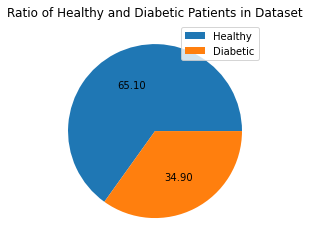

In [46]:
plt.title('Ratio of Healthy and Diabetic Patients in Dataset')
plt.pie(data['Outcome'].value_counts(),autopct='%.2f')
plt.legend(['Healthy','Diabetic'],)
plt.show()

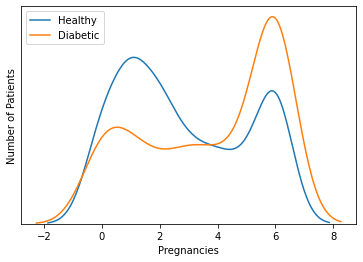

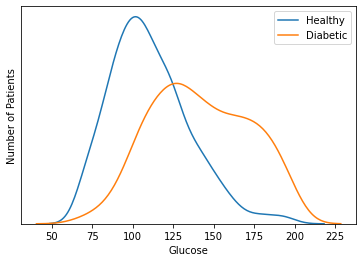

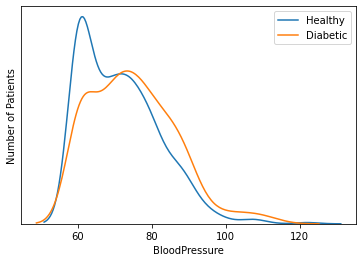

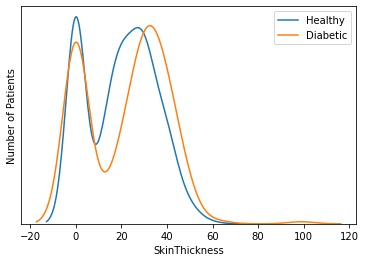

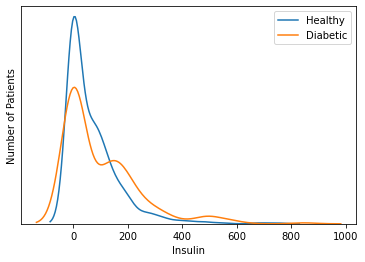

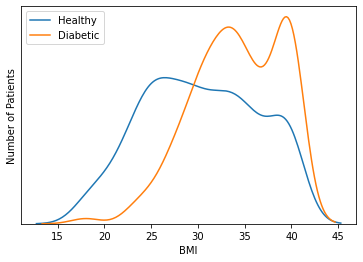

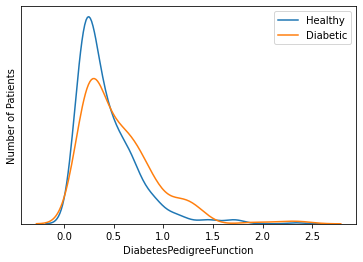

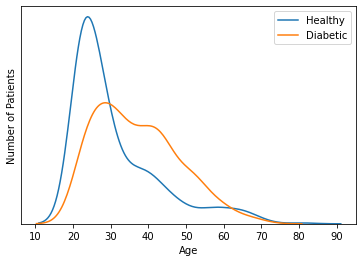

In [48]:
def plot(s):
    sns.kdeplot(data.loc[ data.Outcome == 0, s] )
    sns.kdeplot(data.loc[ data.Outcome == 1, s] )    
    plt.legend(['Healthy','Diabetic'])
    plt.ylabel('Number of Patients')
    plt.yticks([])
    plt.show()
    
for i in data.columns[:-1]:
    plot(i)

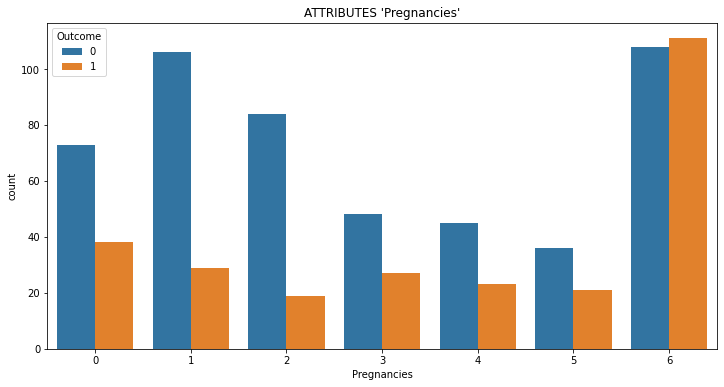

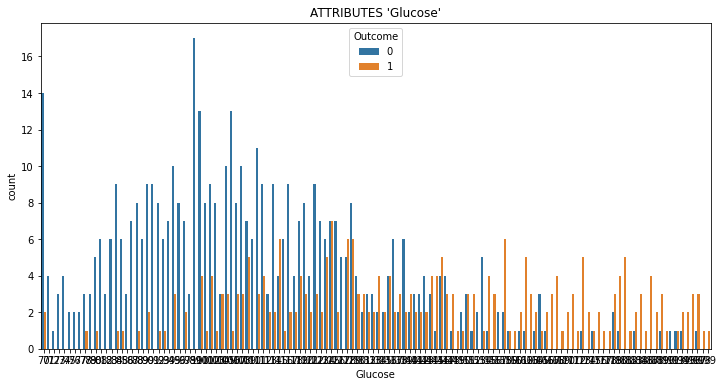

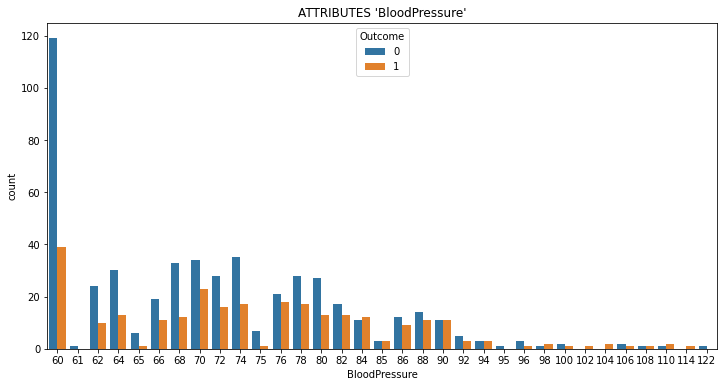

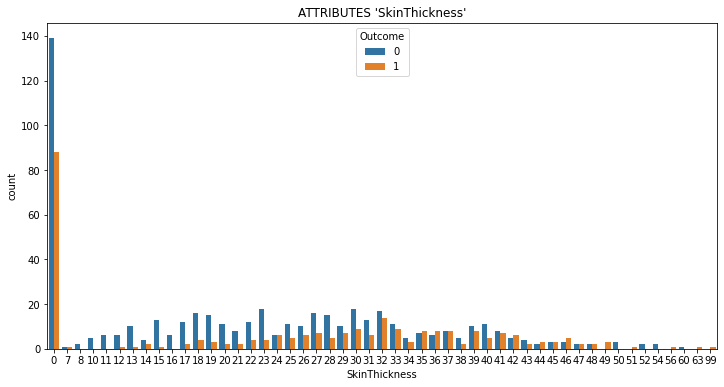

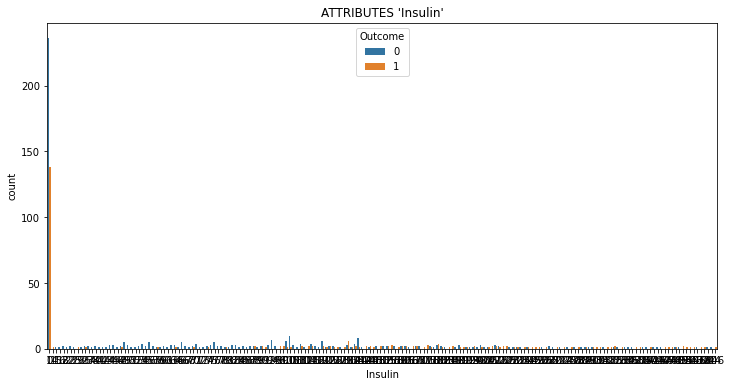

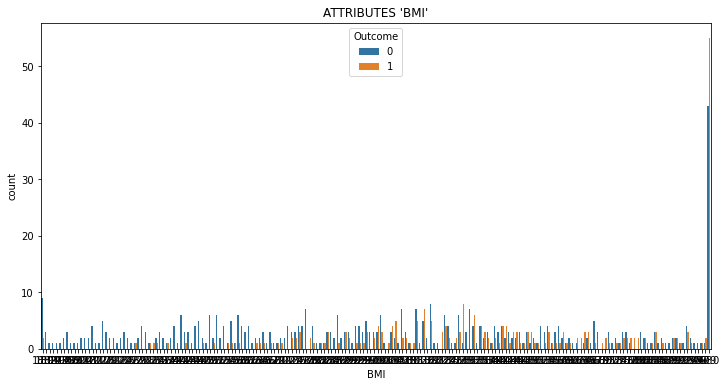

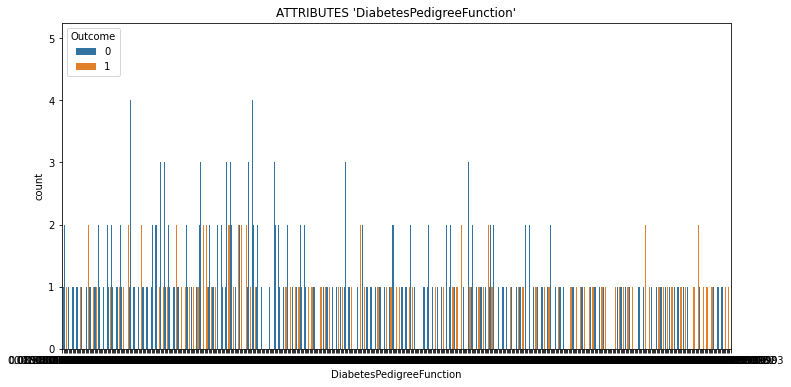

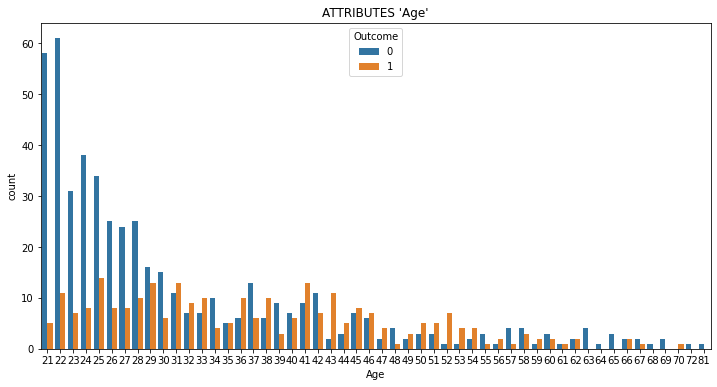

In [71]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(data[i],hue=data['Outcome'])

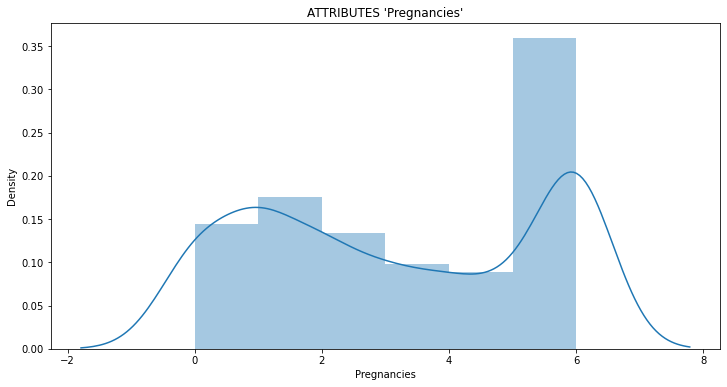

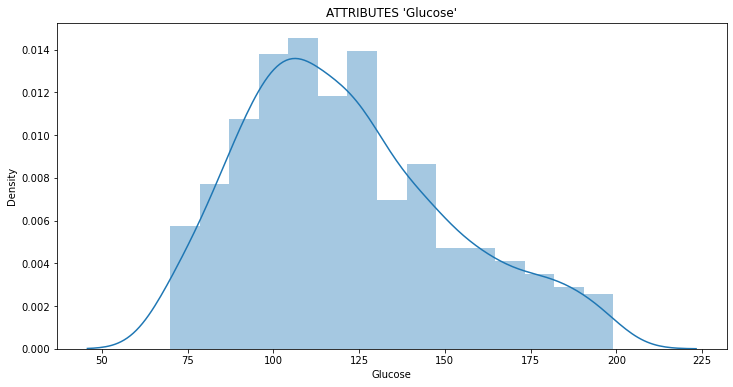

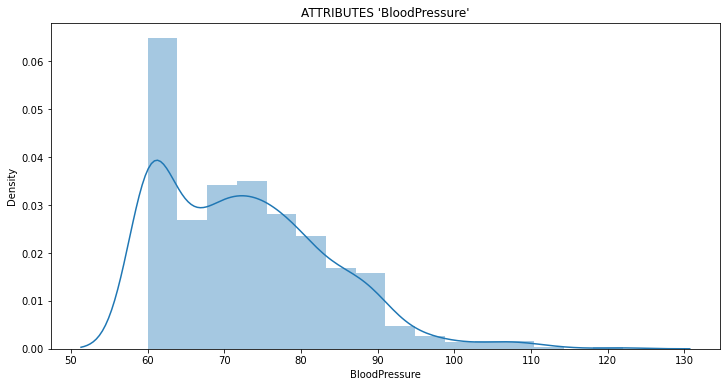

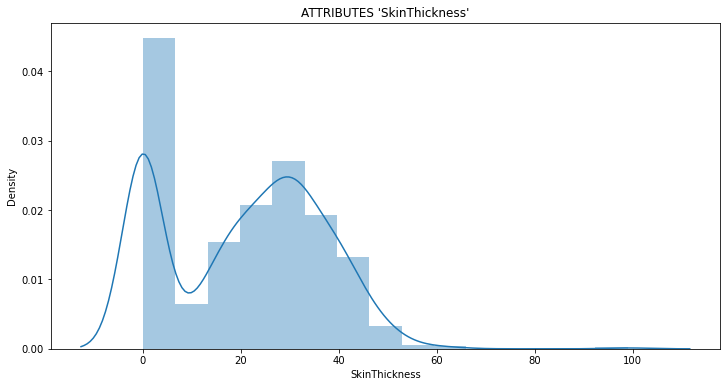

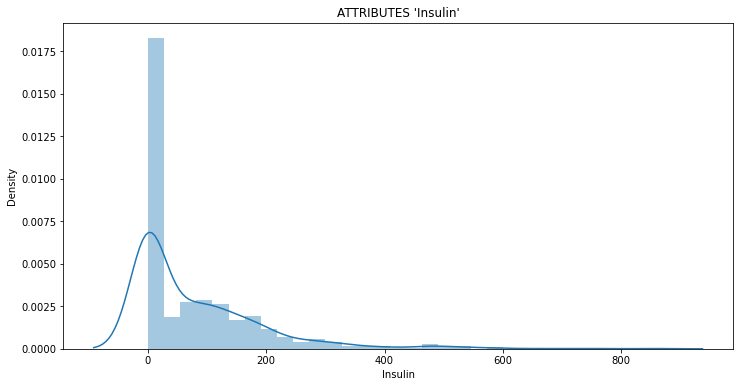

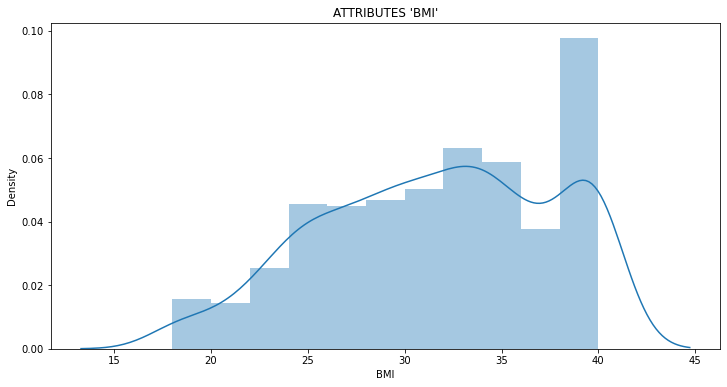

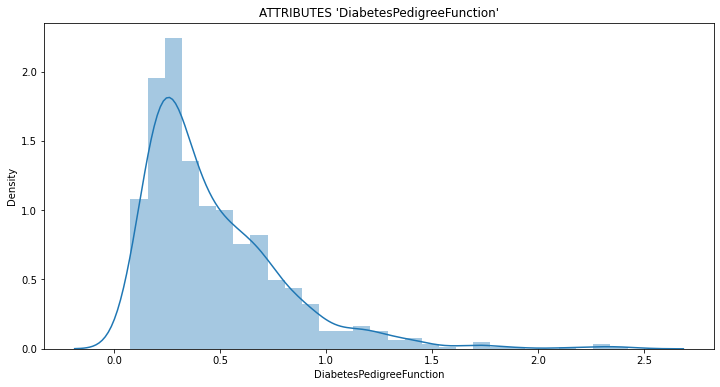

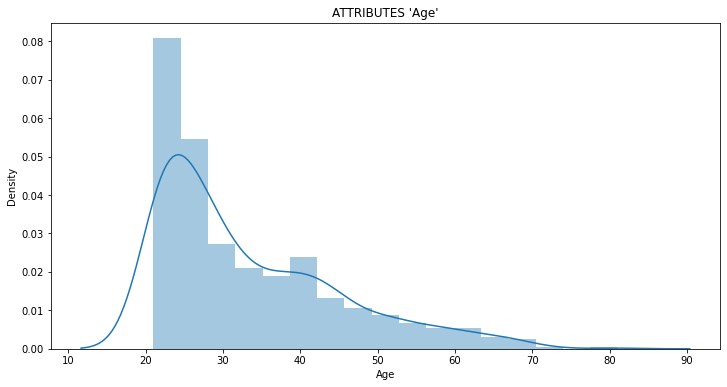

In [74]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.distplot(data[i])

In [22]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the above table , we can infer that there are no correlations between the independent variables . So , we do not need to drop any parameter to eliminate multicollinearity

## Linear Regression Model

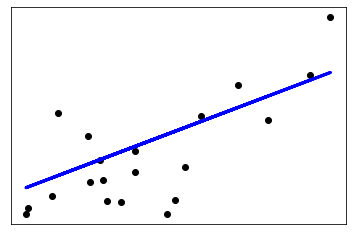

In [42]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## k-Nearest Neighbours Model

In [39]:
train_scores = []
test_scores = []

for i in range(1, 25):
  knn_clf = KNeighborsClassifier(n_neighbors=i)
  knn_clf.fit(X_train, y_train)

  train_scores.append(knn_clf.score(X_train, y_train))
  test_scores.append(knn_clf.score(X_test, y_test))

print(f"Max score of Train dataset at K = {train_scores.index(max(train_scores)) + 1} and score :- {max(train_scores)*100}%")
print(f"Max score of Test dataset at K = {test_scores.index(max(test_scores)) + 1} and score :- {round(max(test_scores)*100, 2)}%")

Max score of Train dataset at K = 1 and score :- 100.0%
Max score of Test dataset at K = 15 and score :- 78.57%


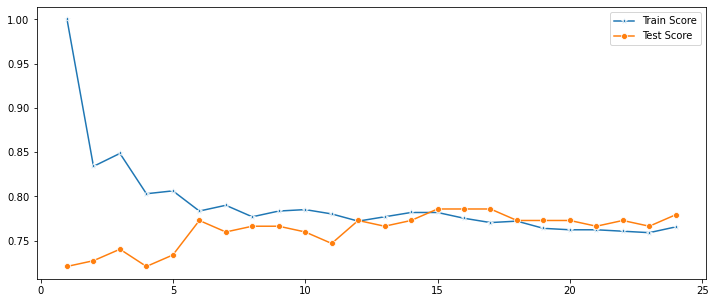

In [40]:
## training history graph 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

## Decision Tree Model

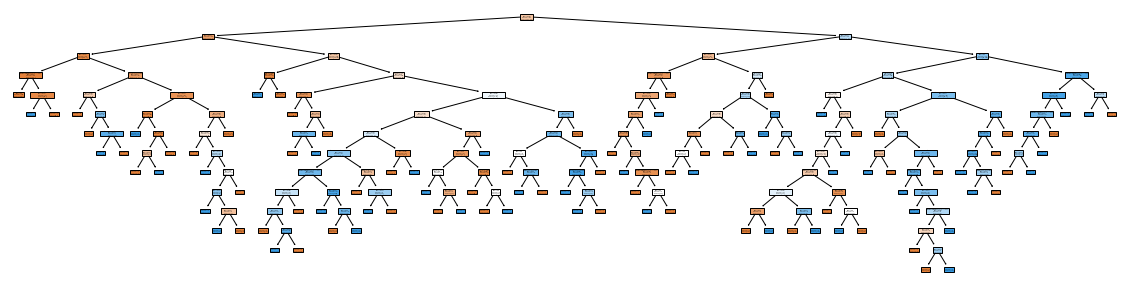

In [52]:
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import *

X = data.drop('Outcome',axis=1).values
y = data['Outcome'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.figure(figsize=(20,5))
plot_tree(clf,feature_names=data.drop('Outcome',axis=1).columns,filled=True)
plt.show()

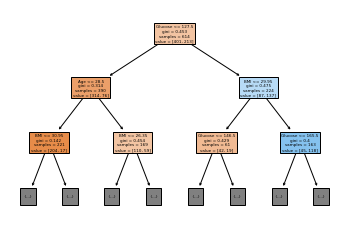

In [54]:
plot_tree(clf,feature_names=data.drop('Outcome',axis=1).columns,max_depth=2,filled=True)
plt.show()